In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split


In [2]:
# CRIM - per capita crime rate by town
# ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
# INDUS - proportion of non-retail business acres per town.
# CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
# NOX - nitric oxides concentration (parts per 10 million)
# RM - average number of rooms per dwelling
# AGE - proportion of owner-occupied units built prior to 1940
# DIS - weighted distances to five Boston employment centres
# RAD - index of accessibility to radial highways
# TAX - full-value property-tax rate per $10,000
# PTRATIO - pupil-teacher ratio by town
# B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
# LSTAT - % lower status of the population
# MEDV - Median value of owner-occupied homes in $1000's

In [3]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [4]:
df = pd.read_csv('Housing.csv', header=None, delimiter=r"\s+", names=column_names)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [6]:
scaler = preprocessing.StandardScaler()

In [7]:
scaler.fit(df.drop('MEDV',axis=1))
scaled_features = scaler.transform(df.drop('MEDV',axis=1))

In [8]:
X = pd.DataFrame(scaled_features,columns=df.columns[:-1])
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


In [9]:
Y=df['MEDV']
Y


0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [10]:
##datasplt
X_train, X_test, y_train, y_test = train_test_split(X,Y
                                                    ,test_size=0.40,random_state=101)
X_cv,X_test1,y_cv,y_test1=train_test_split(X_test,y_test
                                                    ,test_size=0.50,random_state=101)


In [11]:
X_train.shape,y_train.shape

((303, 13), (303,))

In [12]:
X_test1,y_test1

(         CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
 325 -0.398190 -0.487722 -0.548149 -0.272599 -0.532942  0.208521 -1.915822   
 179 -0.413791 -0.487722 -1.266023 -0.272599 -0.576134  0.990659 -0.361825   
 53  -0.414721  0.413589 -0.802031 -0.272599 -0.999412 -0.408356 -1.677566   
 374  1.732178 -0.487722  1.015999 -0.272599  0.978765 -3.058221  1.117494   
 237 -0.360954 -0.487722 -0.720322 -0.272599 -0.412006  1.529180  0.107574   
 ..        ...       ...       ...       ...       ...       ...       ...   
 90  -0.415066 -0.487722 -1.127409 -0.272599 -0.567496  0.188576 -0.088009   
 198 -0.416132  2.945843 -1.403178 -0.272599 -1.301754  1.409508 -1.076593   
 267 -0.353214  0.370669 -1.045700 -0.272599  0.175401  2.866934 -0.056004   
 388  1.247542 -0.487722  1.015999 -0.272599  1.255192 -2.001125  1.117494   
 89  -0.414347 -0.487722 -1.127409 -0.272599 -0.567496  1.131700 -0.194691   
 
           DIS       RAD       TAX   PTRATIO         B     LST

In [13]:
X_cv.shape,y_cv.shape

((101, 13), (101,))

In [14]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.linear_model import Ridge

from sklearn.linear_model import Lasso
listofdegrees =[1,2,3,4,5,6,7,8,9,10]

listofMSE=[]
for i in listofdegrees:
    
    poly_reg = PolynomialFeatures(degree=i)
    X_poly_train = poly_reg.fit_transform(X_train)
    pol_reg = linear_model.LinearRegression()
    model=(pol_reg.fit(X_poly_train,y_train))
    
    x_poly_cv=poly_reg.fit_transform(X_cv)
    Y_predict=model.predict(x_poly_cv)
    listofMSE.append(mean_squared_error(y_cv, Y_predict))
listofMSE    



[38.094716577231175,
 24.661851113196644,
 1312.0450605722328,
 2982.492552620335,
 26171.28642023532,
 263131.9436225843,
 2285354.630398105,
 25724553.921122022,
 113390924.70171341,
 3671678107.190965]

In [15]:
listofdegrees[np.argmin(listofMSE)]


2

In [16]:
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X_train)
X_test_pol=poly_reg.fit_transform(X_test1)
pol_reg = linear_model.LinearRegression()
pol_reg.fit(X_poly, y_train)
y_predict= pol_reg.predict(X_poly)

In [18]:
lamda=[0,0.01,0.02,0.04,0.08,0.16,0.32,0.64,1.28,2.56,5.12,10.24]
listoferror=[]
for i in lamda:
    ridge=Ridge(alpha=i)
    poly_reg = PolynomialFeatures(degree=listofdegrees[np.argmin(listofMSE)])
    X_poly_train_ridge = poly_reg.fit_transform(X_train)
    model_ridge=ridge.fit(X_poly_train_ridge,y_train)
    x_poly_cv_ridge=poly_reg.fit_transform(X_cv)
    Y_predict_ridge=model_ridge.predict(x_poly_cv_ridge)
    listoferror.append(mean_squared_error(y_cv, Y_predict_ridge))
listoferror
    
    

[21.434888613861386,
 26.55233117427265,
 26.12318575274393,
 25.48031583915725,
 24.623322363824556,
 23.538053174130386,
 22.149350799819917,
 20.40889127759214,
 18.57727708668136,
 17.212799003055693,
 16.722323098493504,
 17.140640144441647]

In [19]:
lamda[np.argmin(listoferror)]

5.12

In [20]:
poly_reg1_ridge= PolynomialFeatures(degree=listofdegrees[np.argmin(listofMSE)])

ridge=Ridge(alpha=lamda[np.argmin(listoferror)])
X_poly_train_ridge1 = poly_reg1_ridge.fit_transform(X_train)
model_ridge1=ridge.fit(X_poly_train_ridge1,y_train)
x_poly_test_ridge=poly_reg1_ridge.fit_transform(X_test1)
Y_predict_test_ridge=model_ridge1.predict(x_poly_test_ridge)


In [21]:
print('Coefficients:', model_ridge1.coef_)
print('Intercept:', model_ridge1.intercept_)
print('Mean squared error (MSE): %.2f'

      % mean_squared_error(y_test1, Y_predict_test_ridge))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(y_test1, Y_predict_test_ridge))

Coefficients: [ 0.         -0.20100768  0.14868508  0.38153156  0.11252288 -1.23705826
  3.08898693 -0.79153741 -2.04644685  0.81847158 -0.92338696 -0.85666216
  0.58914939 -3.45073089  0.00983061  0.06054386 -0.09506699  0.58920137
 -0.37606799  0.79937412  0.38319704  0.13371779 -0.8003957   0.08949602
 -0.18587582 -0.16927251  0.79635482  0.00777645 -0.28183396 -0.03820995
  0.14108601  0.41091374 -0.3116297  -0.27387839 -0.06749336  1.47466127
  0.06518271  0.27495901 -0.31168729  0.42016444  0.3106763   1.47169076
  0.35481934  0.61161896  1.16006287 -0.05047801  0.17806178 -0.11685856
 -0.12741047 -1.06815635  0.38210513 -0.62030657 -0.23184286 -0.17765781
  0.58454608 -0.03386983  1.01012603 -0.22305101 -0.61583343 -0.02420253
 -0.65620174 -0.09560937 -0.49277829  0.74409631 -0.99612566  0.113098
 -0.67495796  0.01691987  0.50812707  0.35522942 -0.94147297 -0.01109206
 -0.72523361 -0.60758158 -1.0841803  -0.32628113 -0.35735329  0.10200759
 -0.22403338  1.50650852 -0.61273626  0

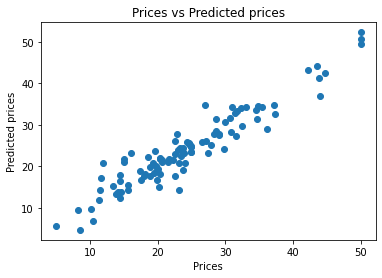

In [22]:
plt.scatter(y_test1, Y_predict_test_ridge)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()